# Explaining the notebook

This notebook aims to analyze the evolution of the covid-19 pandemic and the evolution of the vaccination process all around the world.

We used the data from "Our World in data" that relies on data from Johns Hopkins University.

The following link is the source of our data: https://ourworldindata.org/coronavirus.

And this next link explains how the data extraction was:
https://ourworldindata.org/coronavirus-source-data

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import datetime as dt

In [ ]:
import math

In [ ]:
from statistics import mean

# Reading the data

In [ ]:
data1=pd.read_csv("/work/owid-covid-data1.csv")

In [ ]:
data1.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          1.0        1.0   
1      AFG      Asia  Afghanistan  2020-02-25          1.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          1.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          1.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          1.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0              NaN                597.029                 9.59   
1              NaN                597.029                 9.59   
2              NaN                597.029                 9.59   
3              NaN                597.029                 9.59   
4              NaN                597.029                 9.59   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 60 columns]

In [ ]:
data1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

# Data Preparation

## Variable choice

In [ ]:
#we choose only the variables that might be good for us
data=data1[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
     'total_deaths', 'new_deaths', 'population','total_cases_per_million',
       'new_cases_per_million','total_deaths_per_million',
       'new_deaths_per_million','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
        'people_fully_vaccinated_per_hundred']]

## Date parsing

In [ ]:
data.date.dtype

dtype('O')

In [ ]:
#we create a new column with a date datatype to avoid confusion later in visualization
data["date_p"]=pd.to_datetime(data["date"],format="%Y-%m-%d")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.date_p.dtype

dtype('<M8[ns]')

In [ ]:
#we no longer need the date column with data type 'object'
data.drop("date", inplace=True, axis=1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Handling Missing data

In [ ]:
#calculating the number of missing data in each column
data.isnull().sum()

iso_code                                   0
continent                               4579
location                                   0
total_cases                             3403
new_cases                               3406
total_deaths                           13465
new_deaths                             13309
population                               635
total_cases_per_million                 3904
new_cases_per_million                   3907
total_deaths_per_million               13953
new_deaths_per_million                 13797
total_vaccinations                     81979
people_vaccinated                      82756
people_fully_vaccinated                85582
new_vaccinations                       84524
total_vaccinations_per_hundred         81979
people_vaccinated_per_hundred          82756
people_fully_vaccinated_per_hundred    85582
date_p                                     0
dtype: int64

### Variable Continent

In [ ]:
data.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
#finding which locations are actually giving a null value in the continent column
data.location.loc[data["continent"].isnull()].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

In [ ]:
#putting these cases in other variable in case they were to prove valuable later on
data_World=data.loc[data.location=="World"]
data_Africa=data.loc[data.location=="Africa"]
data_Asia=data.loc[data.location=="Asia"]
data_Europe=data.loc[data.location=="Europe"]
data_European_Union=data.loc[data.location=="European Union"]
data_International=data.loc[data.location=="International"]
data_North_America=data.loc[data.location=="North America"]
data_Oceania=data.loc[data.location=="Oceania"]
data_South_America=data.loc[data.location=="South America"]

In [ ]:
continental_list=["data_World","data_International","data_Africa","data_Asia",
            "data_Europe","data_North_America", "data_South_America",
            "data_Oceania","data_European_Union"]

In [ ]:
#in order to facilitate dropping the rows that we don't need
data.reset_index()

index iso_code continent     location  total_cases  new_cases  \
0          0      AFG      Asia  Afghanistan          1.0        1.0   
1          1      AFG      Asia  Afghanistan          1.0        0.0   
2          2      AFG      Asia  Afghanistan          1.0        0.0   
3          3      AFG      Asia  Afghanistan          1.0        0.0   
4          4      AFG      Asia  Afghanistan          1.0        0.0   
...      ...      ...       ...          ...          ...        ...   
97369  97369      ZWE    Africa     Zimbabwe      40927.0      371.0   
97370  97370      ZWE    Africa     Zimbabwe      41335.0      408.0   
97371  97371      ZWE    Africa     Zimbabwe      41628.0      293.0   
97372  97372      ZWE    Africa     Zimbabwe      41779.0      151.0   
97373  97373      ZWE    Africa     Zimbabwe      42195.0      416.0   

       total_deaths  new_deaths  population  total_cases_per_million  ...  \
0               NaN         NaN  38928341.0                    0.026  ...   
1               NaN         NaN  38928341.0                    0.026  ...   
2               NaN         NaN  38928341.0                    0.026  ...   
3               NaN         NaN  38928341.0                    0.026  ...   
4               NaN         NaN  38928341.0                    0.026  ...   
...             ...         ...         ...                      ...  ...   
97369        1647.0         7.0  14862927.0                 2753.630  ...   
97370        1656.0         9.0  14862927.0                 2781.081  ...   
97371        1666.0        10.0  14862927.0                 2800.794  ...   
97372        1672.0         6.0  14862927.0                 2810.954  ...   
97373        1685.0        13.0  14862927.0                 2838.943  ...   

       total_deaths_per_million  new_deaths_per_million  total_vaccinations  \
0                           NaN                     NaN                 NaN   
1                           NaN                     NaN                 NaN   
2                           NaN                     NaN                 NaN   
3                           NaN                     NaN                 NaN   
4                           NaN                     NaN                 NaN   
...                         ...                     ...                 ...   
97369                   110.813                   0.471           1126087.0   
97370                   111.418                   0.606           1131397.0   
97371                   112.091                   0.673           1133920.0   
97372                   112.495                   0.404           1138733.0   
97373                   113.369                   0.875                 NaN   

       people_vaccinated  people_fully_vaccinated  new_vaccinations  \
0                    NaN                      NaN               NaN   
1                    NaN                      NaN               NaN   
2                    NaN                      NaN               NaN   
3                    NaN                      NaN               NaN   
4                    NaN                      NaN               NaN   
...                  ...                      ...               ...   
97369           698953.0                 427134.0            5214.0   
97370           700244.0                 431153.0            5310.0   
97371           701348.0                 432572.0            2523.0   
97372           703065.0                 435668.0            4813.0   
97373                NaN                      NaN               NaN   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                  

In [ ]:
#finding the indexes of the rows to be dropped
L=list(data.loc[data.location=="Africa"].index)
L=L+list(data.loc[data.location=="Asia"].index)
L=L+list(data.loc[data.location=="Europe"].index)
L=L+list(data.loc[data.location=="European Union"].index)
L=L+list(data.loc[data.location=="International"].index)
L=L+list(data.loc[data.location=="North America"].index)
L=L+list(data.loc[data.location=="Oceania"].index)
L=L+list(data.loc[data.location=="South America"].index)
L=L+list(data.loc[data.location=="World"].index)
len(L)

4579

In [ ]:
#dropping the rows from the main dataset
data.drop(L, inplace=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#checking if there is any other null value in the column
data.continent.isnull().sum()

0

### New cases and deaths and vaccinations variables

In [ ]:
#counting the number of null values in the columns
print(data.new_cases.isnull().sum())
print(data.new_vaccinations.isnull().sum())

3406
81355


In [ ]:
#making a list of the countries using the iso code
Li=list(data.iso_code.unique())

We worked in the following code with the assumption that the early numbers of new cases is zero because either at the time covid19 still hasn't appeared in that specific country or either it was undocumented but because it is only at the early stages of covid the numbers was low thus negligeable.

As for the number vaccination, the vaccin hasn't appeared very early and there is a difference in the time where each country received the vaccin, so any null value of vaccination number is immediatly a zero

We also assumed through observation that there is a generally small difference between the number of new cases and the number of new vaccinations in two consecutive days which is generally negligeable on a larger scale

In [ ]:
for i in Li:
    data.new_cases.loc[data.iso_code==i]=data.new_cases.loc[data.iso_code==i].fillna(method='ffill').fillna(0)
    data.new_vaccinations.loc[data.iso_code==i]=data.new_vaccinations.loc[data.iso_code==i].fillna(method='ffill').fillna(0)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
print(data.new_cases.isnull().sum())
print(data.new_vaccinations.isnull().sum())

0
0


### Total cases and deaths variables

In the following code we replaced any null value in total_cases with the sum of the number of new cases in that day and the number of total cases of the day before.

However since we don't have the number of individuals who healed in that day, this is just a approximation, but it's not too far of an approximation.

And we do the same as new covid cases in case the date is early

In [ ]:
for i in range(1,len(data)):
    if math.isnan(data.total_cases.iloc[i]) and data.iso_code.iloc[i]==data.iso_code.iloc[i-1]:
        data.total_cases.iloc[i]=data.total_cases.iloc[i-1]+data.new_cases.iloc[i]
    elif math.isnan(data.total_cases.iloc[i]) and data.iso_code.iloc[i]!=data.iso_code.iloc[i-1]:
        data.total_cases.iloc[i]=0 

For the number of new deaths we have decided not to launch the counter of new deaths for null values until the number of total cases reaches a certain level that we decided to make it 400 based on a empirical approximation.

And after we get passed that limit for each country we use the same approach as the new cases variable

In [ ]:
for i in range(len(data)):
    if data.total_cases.iloc[i]<=400 and math.isnan(data.new_deaths.iloc[i]):
        data.new_deaths.iloc[i]=0
for i in Li:
    data.new_deaths.loc[data.iso_code==i]=data.new_deaths.loc[data.iso_code==i].fillna(method='ffill').fillna(0)

In [ ]:
print(data.new_deaths.isnull().sum())

0


For the total deaths and total vaccination variables we used the same approach as the one we use in the total cases variable

In [ ]:
if math.isnan(data.total_deaths.iloc[0]):
    data.total_deaths.iloc[0]=0
for i in range(1,len(data)):
    if math.isnan(data.total_deaths.iloc[i]) and data.iso_code.iloc[i]==data.iso_code.iloc[i-1]:
        data.total_deaths.iloc[i]=data.total_deaths.iloc[i-1]+data.new_deaths.iloc[i]
    elif math.isnan(data.total_deaths.iloc[i]) and data.iso_code.iloc[i]!=data.iso_code.iloc[i-1]:
        data.total_deaths.iloc[i]=0

In [ ]:
if math.isnan(data.total_vaccinations.iloc[0]):
    data.total_vaccinations.iloc[0]=0
for i in range(1,len(data)):
    if math.isnan(data.total_vaccinations.iloc[i]) and data.iso_code.iloc[i]==data.iso_code.iloc[i-1]:
        data.total_vaccinations.iloc[i]=data.total_vaccinations.iloc[i-1]+data.new_vaccinations.iloc[i]
    elif math.isnan(data.total_vaccinations.iloc[i]) and data.iso_code.iloc[i]!=data.iso_code.iloc[i-1]:
        data.total_vaccinations.iloc[i]=0

In [ ]:
#checking the number of null/missing values in each column
data.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
total_cases                                0
new_cases                                  0
total_deaths                               0
new_deaths                                 0
population                               134
total_cases_per_million                 3398
new_cases_per_million                   3406
total_deaths_per_million               13295
new_deaths_per_million                 13296
total_vaccinations                         0
people_vaccinated                      79606
people_fully_vaccinated                82295
new_vaccinations                           0
total_vaccinations_per_hundred         78829
people_vaccinated_per_hundred          79606
people_fully_vaccinated_per_hundred    82295
date_p                                     0
dtype: int64

## Reorganizing the Data

Starting from here we have decided to instead of working on daily data, to work on monthly data in order to accelerate and simplify the process

In [ ]:
#we make a new column that only contains the month and the year
data['date']=data.date_p.dt.to_period('M')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#calculating the number of dates for each country
M=[]
for i in Li:
    n=len(list(data.date.loc[data.iso_code==i].unique()))
    M.append((i,n))
print(M)

[('AFG', 17), ('ALB', 17), ('DZA', 17), ('AND', 16), ('AGO', 16), ('AIA', 5), ('ATG', 16), ('ARG', 18), ('ARM', 16), ('ABW', 4), ('AUS', 18), ('AUT', 17), ('AZE', 16), ('BHS', 16), ('BHR', 17), ('BGD', 16), ('BRB', 16), ('BLR', 17), ('BEL', 17), ('BLZ', 16), ('BEN', 16), ('BMU', 6), ('BTN', 16), ('BOL', 16), ('BES', 1), ('BIH', 16), ('BWA', 16), ('BRA', 17), ('VGB', 2), ('BRN', 16), ('BGR', 16), ('BFA', 16), ('BDI', 16), ('KHM', 18), ('CMR', 16), ('CAN', 18), ('CPV', 16), ('CYM', 7), ('CAF', 16), ('TCD', 16), ('CHL', 17), ('CHN', 18), ('COL', 16), ('COM', 15), ('COG', 16), ('COK', 2), ('CRI', 16), ('CIV', 16), ('HRV', 17), ('CUB', 16), ('CUW', 4), ('CYP', 16), ('CZE', 16), ('COD', 16), ('DNK', 17), ('DJI', 16), ('DMA', 16), ('DOM', 16), ('ECU', 16), ('EGY', 17), ('SLV', 16), ('GNQ', 16), ('ERI', 16), ('EST', 18), ('SWZ', 16), ('ETH', 16), ('FRO', 6), ('FLK', 3), ('FJI', 18), ('FIN', 18), ('FRA', 18), ('PYF', 5), ('GAB', 16), ('GMB', 16), ('GEO', 17), ('DEU', 18), ('GHA', 16), ('GIB', 6

Thus we can conclude from the previous list that the countries don't have the same number dates, in other terms many countries are undocumented enough

In [ ]:
#Making a list of every country that are "undocumented" enough we choose 17 is the minimum of dates to have
bl=[]
for i,j in M:
    if j<17:
        bl.append(i)
print(bl)

['AND', 'AGO', 'AIA', 'ATG', 'ARM', 'ABW', 'AZE', 'BHS', 'BGD', 'BRB', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CMR', 'CPV', 'CYM', 'CAF', 'TCD', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DJI', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'ERI', 'SWZ', 'ETH', 'FRO', 'FLK', 'PYF', 'GAB', 'GMB', 'GHA', 'GIB', 'GRL', 'GRD', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'IDN', 'IMN', 'JAM', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KGZ', 'LAO', 'LSO', 'LBR', 'LBY', 'LIE', 'MAC', 'MDG', 'MWI', 'MDV', 'MLI', 'MHL', 'MRT', 'MUS', 'FSM', 'MDA', 'MNG', 'MNE', 'MSR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NCL', 'NIC', 'NER', 'OWID_CYN', 'PSE', 'PAN', 'PNG', 'PRY', 'PCN', 'POL', 'RWA', 'SHN', 'KNA', 'LCA', 'VCT', 'WSM', 'STP', 'SAU', 'SYC', 'SLE', 'SXM', 'SVK', 'SLB', 'SOM', 'SSD', 'SDN', 'SUR', 'SYR', 'TJK', 'TZA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'URY', 'UZB', 'VUT', 'VAT', 'V

These are the countrries that are undocumented enough

In [ ]:
date_list=list(data.date.unique())
iso_list=list(data.iso_code.unique())
location_list=list(data.location.unique())

In [ ]:
print(len(bl))
print(len(iso_list))
print(len(iso_list)-len(bl))

146
221
75


Thus we can say that we have only 75 countries that are documented enough to use thus we shall take in consideration these 75 countries

In [ ]:
#finding the indexes of each "undocumented" country
L=[]
for i in bl:
    L=L+list(data.loc[data.iso_code==i].index)
print(len(L))

55424


In [ ]:
#dropping the data of these countries
data.drop(L, inplace=True)

In [ ]:
date_list

[Period('2020-02', 'M'),
 Period('2020-03', 'M'),
 Period('2020-04', 'M'),
 Period('2020-05', 'M'),
 Period('2020-06', 'M'),
 Period('2020-07', 'M'),
 Period('2020-08', 'M'),
 Period('2020-09', 'M'),
 Period('2020-10', 'M'),
 Period('2020-11', 'M'),
 Period('2020-12', 'M'),
 Period('2021-01', 'M'),
 Period('2021-02', 'M'),
 Period('2021-03', 'M'),
 Period('2021-04', 'M'),
 Period('2021-05', 'M'),
 Period('2021-06', 'M'),
 Period('2020-01', 'M')]

In [ ]:
len(date_list)

18

In [ ]:
fully_doc=data.iso_code.loc[data.date=='2020-01'].unique()
print(fully_doc)
len(data.location.loc[data.date=='2020-01'].unique())

['ARG' 'AUS' 'KHM' 'CAN' 'CHN' 'EST' 'FJI' 'FIN' 'FRA' 'DEU' 'GRC' 'HKG'
 'IND' 'ITA' 'JPN' 'LVA' 'MYS' 'MEX' 'NPL' 'PER' 'PHL' 'PRT' 'RUS' 'SGP'
 'KOR' 'LKA' 'TWN' 'THA' 'ARE' 'GBR' 'USA' 'VNM']


32

In [ ]:
P=data.date.loc[data.iso_code=='ARG'].unique()
P[0]

Period('2020-01', 'M')

In [ ]:
v=0
V=[]
for i,j in M:
    if j==17:
        v+=1
        V.append(i)
print(v)
V

43


['AFG',
 'ALB',
 'DZA',
 'AUT',
 'BHR',
 'BLR',
 'BEL',
 'BRA',
 'CHL',
 'HRV',
 'DNK',
 'EGY',
 'GEO',
 'GTM',
 'ISL',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'KWT',
 'LBN',
 'LTU',
 'LUX',
 'MLT',
 'MCO',
 'MAR',
 'NLD',
 'NZL',
 'NGA',
 'MKD',
 'NOR',
 'OMN',
 'PAK',
 'QAT',
 'ROU',
 'SMR',
 'SEN',
 'SRB',
 'SVN',
 'ZAF',
 'ESP',
 'SWE',
 'CHE']

We can notice from these previous results that the countries with the 18 months have one month extra that is 01-2020, so we have 2 main choices, either we get rid of the first month for those 32 countries, or we add that month to the other 43 countries, but for every variable we will count it as Zero for that first month due to the fact that it has been the very first beggining of the pandemic, in other terms it hasn't spread far in countries beside Italy and China and USA, so the level of these variables in other countries low if not zero.

In [ ]:
print(data.iso_code.loc[0])

AFG


In [ ]:
#we started these lists with zero because the first country with the code
#AFG starts with 02-2021 
#so that zero is for the 01-2021
total_cases_list=[0] 
new_vaccinations_list=[0]
total_vaccinations_list=[0]
new_deaths_list=[0]
total_deaths_list=[0]
new_cases_list=[0]
#we made the following lists to store the data of each month and to finally sum to get 
#one data per each month and country
#we start these lists with the first element because the for loop starts with 1 not 0
lis_total_cases=[data.total_cases.iloc[0]]
lis_new_cases=[data.new_cases.iloc[0]]
lis_total_vaccinations=[data.total_vaccinations.iloc[0]]
lis_new_vaccinations=[data.new_vaccinations.iloc[0]]
lis_total_deaths=[data.total_deaths.iloc[0]]
lis_new_deaths=[data.new_deaths.iloc[0]]
full_date_list=[P[0], data.date.iloc[0]]
full_iso_list=[data.iso_code.iloc[0], data.iso_code.iloc[0]]
full_location_list=[data.location.iloc[0], data.location.iloc[0]]

for i in range(1,len(data)):
    if data.iso_code.iloc[i]==data.iso_code.iloc[i-1] and data.date.iloc[i]==data.date.iloc[i-1]:
        lis_total_cases.append(data.total_cases.iloc[i])
        lis_new_cases.append(data.new_cases.iloc[i])
        lis_total_vaccinations.append(data.total_vaccinations.iloc[i])
        lis_new_vaccinations.append(data.new_vaccinations.iloc[i])
        lis_total_deaths.append(data.total_deaths.iloc[i])
        lis_new_deaths.append(data.new_deaths.iloc[i])
    elif data.iso_code.iloc[i]!=data.iso_code.iloc[i-1] and data.iso_code.iloc[i] not in fully_doc:
        total_cases_list.append(mean(lis_total_cases))
        total_cases_list.append(0)
        new_cases_list.append(mean(lis_new_cases))
        new_cases_list.append(0)
        total_deaths_list.append(mean(lis_total_deaths))
        total_deaths_list.append(0)
        new_deaths_list.append(mean(lis_new_deaths))
        new_deaths_list.append(0)
        total_vaccinations_list.append(mean(lis_total_vaccinations))
        total_vaccinations_list.append(0)
        new_vaccinations_list.append(mean(lis_new_vaccinations))
        new_vaccinations_list.append(0)
        lis_new_cases=[data.new_cases.iloc[i]]
        lis_new_deaths=[data.new_deaths.iloc[i]]
        lis_new_vaccinations=[data.new_vaccinations.iloc[i]]
        lis_total_cases=[data.total_cases.iloc[i]]
        lis_total_deaths=[data.total_deaths.iloc[i]]
        lis_total_vaccinations=[data.total_vaccinations.iloc[i]]
        full_location_list.append(data.location.iloc[i])
        full_iso_list.append(data.iso_code.iloc[i])
        full_date_list.append(P[0])
        full_date_list.append(data.date.iloc[i])
        full_iso_list.append(data.iso_code.iloc[i])
        full_location_list.append(data.location.iloc[i])
    else:
        total_cases_list.append(mean(lis_total_cases))
        new_cases_list.append(mean(lis_new_cases))
        total_deaths_list.append(mean(lis_total_deaths))
        new_deaths_list.append(mean(lis_new_deaths))
        total_vaccinations_list.append(mean(lis_total_vaccinations))
        new_vaccinations_list.append(mean(lis_new_vaccinations))
        lis_new_cases=[data.new_cases.iloc[i]]
        lis_new_deaths=[data.new_deaths.iloc[i]]
        lis_new_vaccinations=[data.new_vaccinations.iloc[i]]
        lis_total_cases=[data.total_cases.iloc[i]]
        lis_total_deaths=[data.total_deaths.iloc[i]]
        lis_total_vaccinations=[data.total_vaccinations.iloc[i]]
        full_date_list.append(data.date.iloc[i])
        full_iso_list.append(data.iso_code.iloc[i])
        full_location_list.append(data.location.iloc[i])
    if i==len(data)-1:
        total_cases_list.append(mean(lis_total_cases))
        new_cases_list.append(mean(lis_new_cases))
        total_deaths_list.append(mean(lis_total_deaths))
        new_deaths_list.append(mean(lis_new_deaths))
        total_vaccinations_list.append(mean(lis_total_vaccinations))
        new_vaccinations_list.append(mean(lis_new_vaccinations))


In [ ]:
print(len(total_cases_list))
print(len(total_deaths_list))
print(len(total_vaccinations_list))
print(len(new_cases_list))
print(len(new_deaths_list))
print(len(new_vaccinations_list))
print(len(full_location_list))
print(len(full_date_list))
print(len(full_iso_list))

1350
1350
1350
1350
1350
1350
1350
1350
1350


And now we make a dataframe containing these new data per month

In [ ]:
new_data=pd.DataFrame({
    "iso_code": full_iso_list,
    "date":     full_date_list,
    "location": full_location_list,
    "total_cases": total_cases_list,
    "new_cases":   new_cases_list,
    "total_deaths": total_deaths_list,
    "new_deaths": new_deaths_list,
    "total_vaccinations": total_vaccinations_list,
    "new_vaccinations": new_vaccinations_list
})

In [ ]:
new_data.head()

iso_code     date     location  total_cases   new_cases  total_deaths  \
0      AFG  2020-01  Afghanistan     0.000000    0.000000      0.000000   
1      AFG  2020-02  Afghanistan     1.000000    0.166667      0.000000   
2      AFG  2020-03  Afghanistan    37.548387    5.612903      0.870968   
3      AFG  2020-04  Afghanistan   902.466667   65.066667     29.666667   
4      AFG  2020-05  Afghanistan  7279.806452  421.967742    161.516129   

   new_deaths  total_vaccinations  new_vaccinations  
0    0.000000                 0.0               0.0  
1    0.000000                 0.0               0.0  
2    0.129032                 0.0               0.0  
3    2.000000                 0.0               0.0  
4    6.258065                 0.0               0.0

And now we will apply these same modifications to the the continental data

We will combine all these modification in a function

In [ ]:
date_list=list(new_data.date.unique())
date_list

[Period('2020-01', 'M'),
 Period('2020-02', 'M'),
 Period('2020-03', 'M'),
 Period('2020-04', 'M'),
 Period('2020-05', 'M'),
 Period('2020-06', 'M'),
 Period('2020-07', 'M'),
 Period('2020-08', 'M'),
 Period('2020-09', 'M'),
 Period('2020-10', 'M'),
 Period('2020-11', 'M'),
 Period('2020-12', 'M'),
 Period('2021-01', 'M'),
 Period('2021-02', 'M'),
 Period('2021-03', 'M'),
 Period('2021-04', 'M'),
 Period('2021-05', 'M'),
 Period('2021-06', 'M')]

And that's it for the data cleaning part we pass on the next part data analysis

ignore this part: I can't believe it took 4 days to do this entire part

In [ ]:
new_data.to_csv('/work/data_clean.csv')

# Data Cleaning For Continental Data

In here we just applied the same changes that we did for our data to the continents and World data

In [ ]:
data=data1[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
     'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million','total_deaths_per_million',
       'new_deaths_per_million','population','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
        'people_fully_vaccinated_per_hundred']]

data["date_p"]=pd.to_datetime(data["date"],format="%Y-%m-%d")
data.drop("date", inplace=True, axis=1)

all_data=data.loc[data["continent"].isnull()]

all_data.drop('continent', inplace=True, axis=1)

Li=[]
Li=list(all_data.iso_code.unique())

for i in Li:
    all_data.new_cases.loc[all_data.iso_code==i]=all_data.new_cases.loc[all_data.iso_code==i].fillna(method='ffill').fillna(0)
    all_data.new_vaccinations.loc[all_data.iso_code==i]=all_data.new_vaccinations.loc[all_data.iso_code==i].fillna(method='ffill').fillna(0)

if math.isnan(all_data.total_cases.iloc[0]):
    all_data.total_cases.iloc[0]=0
for i in range(1,len(all_data)):
    if math.isnan(all_data.total_cases.iloc[i]) and all_data.iso_code.iloc[i]==all_data.iso_code.iloc[i-1]:
        all_data.total_cases.iloc[i]=all_data.total_cases.iloc[i-1]+all_data.new_cases.iloc[i]
    elif math.isnan(all_data.total_cases.iloc[i]) and all_data.iso_code.iloc[i]!=all_data.iso_code.iloc[i-1]:
        all_data.total_cases.iloc[i]=0 


for i in range(len(all_data)):
    if all_data.total_cases.iloc[i]<=400 and math.isnan(all_data.new_deaths.iloc[i]):
        all_data.new_deaths.iloc[i]=0
for i in Li:
    all_data.new_deaths.loc[all_data.iso_code==i]=all_data.new_deaths.loc[all_data.iso_code==i].fillna(method='ffill').fillna(0)

if math.isnan(all_data.total_deaths.iloc[0]):
    all_data.total_deaths.iloc[0]=0
for i in range(1,len(all_data)):
    if math.isnan(all_data.total_deaths.iloc[i]) and all_data.iso_code.iloc[i]==all_data.iso_code.iloc[i-1]:
        all_data.total_deaths.iloc[i]=all_data.total_deaths.iloc[i-1]+all_data.new_deaths.iloc[i]
    elif math.isnan(all_data.total_deaths.iloc[i]) and all_data.iso_code.iloc[i]!=all_data.iso_code.iloc[i-1]:
        all_data.total_deaths.iloc[i]=0

if math.isnan(all_data.total_vaccinations.iloc[0]):
    all_data.total_vaccinations.iloc[0]=0
for i in range(1,len(all_data)):
    if math.isnan(all_data.total_vaccinations.iloc[i]) and all_data.iso_code.iloc[i]==all_data.iso_code.iloc[i-1]:
        all_data.total_vaccinations.iloc[i]=all_data.total_vaccinations.iloc[i-1]+all_data.new_vaccinations.iloc[i]
    elif math.isnan(all_data.total_vaccinations.iloc[i]) and all_data.iso_code.iloc[i]!=all_data.iso_code.iloc[i-1]:
        all_data.total_vaccinations.iloc[i]=0

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [ ]:
all_data.isnull().sum()

iso_code                                  0
location                                  0
total_cases                               0
new_cases                                 0
total_deaths                              0
new_deaths                                0
total_cases_per_million                 506
new_cases_per_million                   501
total_deaths_per_million                658
new_deaths_per_million                  501
population                              501
total_vaccinations                        0
people_vaccinated                      3150
people_fully_vaccinated                3287
new_vaccinations                          0
total_vaccinations_per_hundred         3150
people_vaccinated_per_hundred          3150
people_fully_vaccinated_per_hundred    3287
date_p                                    0
dtype: int64

In [ ]:
all_data.to_csv('/work/all_data.csv')

# Data Analysis

In [ ]:
w_data=pd.read_csv('/work/data_clean.csv')

In [ ]:
w_data.head()

Unnamed: 0 iso_code     date     location  total_cases   new_cases  \
0           0      AFG  2020-01  Afghanistan     0.000000    0.000000   
1           1      AFG  2020-02  Afghanistan     1.000000    0.166667   
2           2      AFG  2020-03  Afghanistan    37.548387    5.612903   
3           3      AFG  2020-04  Afghanistan   902.466667   65.066667   
4           4      AFG  2020-05  Afghanistan  7279.806452  421.967742   

   total_deaths  new_deaths  total_vaccinations  new_vaccinations  
0      0.000000    0.000000                 0.0               0.0  
1      0.000000    0.000000                 0.0               0.0  
2      0.870968    0.129032                 0.0               0.0  
3     29.666667    2.000000                 0.0               0.0  
4    161.516129    6.258065                 0.0               0.0

In [ ]:
w_data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Australia',
       'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Brazil', 'Cambodia',
       'Canada', 'Chile', 'China', 'Croatia', 'Denmark', 'Egypt',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Guatemala', 'Hong Kong', 'Iceland', 'India', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia',
       'Lebanon', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta',
       'Mexico', 'Monaco', 'Morocco', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Peru', 'Philippines', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'San Marino', 'Senegal', 'Serbia', 'Singapore',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',
       'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Vietnam'], dtype=object)

In [ ]:
w_data['total_deaths_per_cases']=100* w_data.total_deaths/w_data.total_cases

In [ ]:
w_data.total_deaths_per_cases = w_data.total_deaths_per_cases.fillna(0)

## For all Countries

In [ ]:
fig=px.line(w_data, x="date", y="total_cases", color="location")
fig.show()

In [ ]:
fig=px.line(w_data, x="date", y="total_deaths", color="location")
fig.show()

In [ ]:
fig=px.line(w_data, x="date", y="total_deaths_per_cases", color="location")
fig.show()

In [ ]:
fig=px.line(w_data, x="date", y="total_vaccinations", color="location")
fig.show()

Let's compute the evolution rate for each country and compare them to see the countries with similar case evolution rate that we will refer to as regular countries and the countries with abnormal evolution rates that we will name irregular countries

We will calculate this evolution by fitting the data from each country and we will take it's coefficients to find the average number by which the evolution of covid in each country is progressing

In [ ]:
#import the necessary functions
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess

#looping over each country
Locations = list(w_data.location.unique())
coefficients = []

for i in Locations:
    data_1 = w_data.loc[w_data.location==i]
    dp = DeterministicProcess(
        index=data_1.date,  # dates from the training data
        constant=True,       # dummy feature for the bias (y_intercept)
        order=1,             # the time dummy (trend)
        drop=True,           # drop terms if necessary to avoid collinearity
    )
    X = dp.in_sample()
    y = data_1["total_cases"]
    reg = LinearRegression().fit(X, y)
    coefficients.append(reg.coef_[1])
comparison_data=pd.DataFrame({
    "locations": Locations,
    "coefficients": coefficients
})
comparison_data.head()

locations   coefficients
0  Afghanistan    4673.745622
1      Albania    9064.436865
2      Algeria    9255.226179
3    Argentina  226091.495355
4    Australia    2091.880171

In [ ]:
fig = px.bar(comparison_data, x='locations', y='coefficients')
fig.show()

In [ ]:
fig = px.histogram(comparison_data, x='coefficients', marginal="box")
fig.show()

In [ ]:
data_1 = w_data.loc[w_data.location=='United States']
dp = DeterministicProcess(
    index=data_1.date,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
    )
X = dp.in_sample()
y = data_1["total_cases"]
reg = LinearRegression(fit_intercept=False).fit(X, y)
S=pd.DataFrame(reg.predict(X), index=X.index)
L=list(reg.predict(X))

In [ ]:
X

const  trend
date                 
2020-01    1.0    1.0
2020-02    1.0    2.0
2020-03    1.0    3.0
2020-04    1.0    4.0
2020-05    1.0    5.0
2020-06    1.0    6.0
2020-07    1.0    7.0
2020-08    1.0    8.0
2020-09    1.0    9.0
2020-10    1.0   10.0
2020-11    1.0   11.0
2020-12    1.0   12.0
2021-01    1.0   13.0
2021-02    1.0   14.0
2021-03    1.0   15.0
2021-04    1.0   16.0
2021-05    1.0   17.0
2021-06    1.0   18.0

<AxesSubplot:xlabel='date', ylabel='total_cases'>

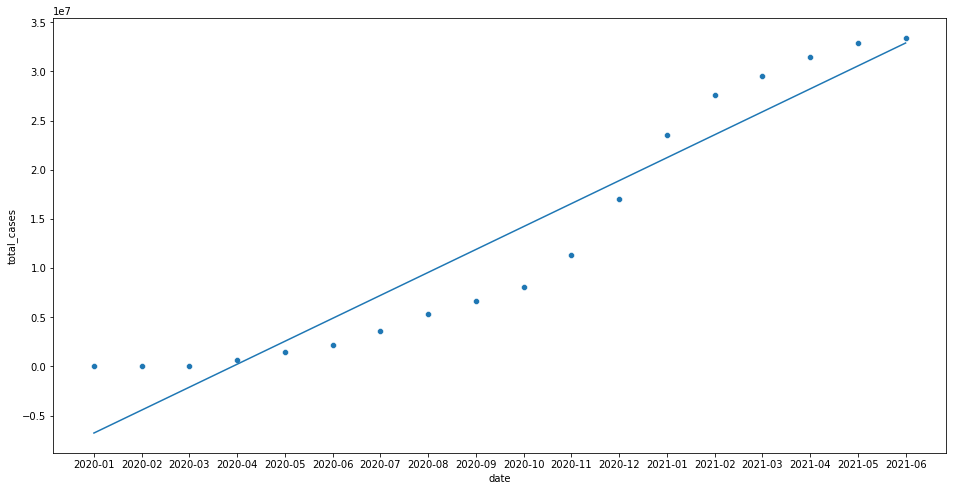

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=X.index, y=data_1["total_cases"])
sns.lineplot(x=X.index, y=L)

## Irregular countries

Based on the previous graphs we notice that the countries that had the most variation in this pandemic are the US, India, UK, Mexico, Brazil

Thus, starting from now we will be working with only 5 countries: US, India, UK, Mexico, Brazil

In here irregular stands for countries with the most variations and that are different on the scale of variation from other countries.

In [ ]:
w_data1=w_data.loc[w_data.location.isin(["United States", "India", "United Kingdom", "Mexico", "Brazil"])]

In [ ]:
cou=["United States", "India", "United Kingdom", "Mexico", "Brazil"]
pop=[332907877,1393409038,68236097,130262216,214029732]

In [ ]:
w_data1['population']=w_data1.location
for j in range(len(w_data1)):
    for i in range(len(cou)):
        if w_data1.location.iloc[j]==cou[i]:
            w_data1.population.iloc[j]=pop[i]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [ ]:
w_data1['total_cases_per_population'] = 100 * w_data1.total_cases/w_data1.population

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.line(w_data1,x="date",y="total_cases",color="location")
fig.show()

Generally in all of these 5 countries the number of total cases keeps on increasing every month at different rates at an alarming rate every month

However starting from the month of May those numbers started to decrease in all these countries most likely due to the start of the vaccination process in these countries

In [ ]:
fig7=px.line(w_data1,x="date",y="total_cases_per_population",color="location")
fig7.show()

in this graph, we are comparing the number of total cases per population that could translate the real effect and damage that each country is suffering from due to the pandemic.

Thus the most countries that are suffering are the US first, Brazil and UK that rank second and third interchangeably, followed by Mexico and India.

In [ ]:
fig1=px.line(w_data1,x="date",y="total_deaths",color="location")
fig1.show()

We can notice in the previous graph that the evolution of the number of total deaths follows almost the same pattern although the numbers are not as high as the number of total cases

In [ ]:
fig3=px.line(w_data1,x="date",y="total_deaths_per_cases",color="location")
fig3.show()

In this previous plot it is very obvious that covid 19 had a huge effect on these countries, due to the great increase of the number of deaths per cases since February 2020 but 

In [ ]:
fig2=px.line(w_data1,x="date",y="total_vaccinations",color="location")
fig2.show()

For these countries the vaccinations has started since almost december and the number of these vaccinations are increasing with an almost exponential rate

In [ ]:
fig4=px.line(w_data1, x="date", y="new_cases", color="location")
fig4.show()

In [ ]:
fig5=px.line(w_data1, x="date", y="new_deaths", color="location")
fig5.show()

In [ ]:
fig6=px.line(w_data1, x="date", y="new_vaccinations", color="location")
fig6.show()

However all of these countries could be described as irregular due to the fact that their variation rates are much greater than the those in almost countries, so these countries do not constitute an accurate representation of the world's countries.

That's why we are going to work with countries that are more representative of this rest of world

## Regular Countries

For the regular Countries we are going to work with 5 countries that are Morocco, Austria, Egypt, Ireland, Belgium

In [ ]:
w_data2=w_data.loc[w_data.location.isin(['Morocco', 'Austria', 'Egypt', 'Ireland', 'Belgium'])]

In [ ]:
coun=['Morocco', 'Austria', 'Egypt', 'Ireland', 'Belgium']
popu=[37130000,9056701,104190766,4991855,11639150]

In [ ]:
w_data2['population']=w_data2.location
for j in range(len(w_data2)):
    for i in range(len(coun)):
        if w_data2.location.iloc[j]==coun[i]:
            w_data2.population.iloc[j]=popu[i]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
w_data2['total_cases_per_population'] = 100 * w_data2.total_cases/w_data2.population

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig=px.line(w_data2,x="date",y="total_cases",color="location")
fig.show()

In this graph we can notice that the number of total cases keeps increasing but at 3 different paces

For Belgium, we have a relatively fast increasing pace of the number of total cases but not as much as the irregular countries but still faster than the other countries.

For Morocco and Austria, the increase rate is medium so the propagation pace is not very big in these countries

For Egypt and Ireland, we can notice a lower increasing pace thus the number of total cases in these countries is relatively low.

In [ ]:
fig2=px.line(w_data2,x="date",y="total_cases_per_population",color="location")
fig2.show()

In here, the rapidly increasing total number of cases in Belgium translates to a similar effect in that country however Ireland despite lower numbers and a lower increasing rate suffered much more than expected as well as Austria that ranks second in the matter effect followed by Morocco.

And as expected Egypt did not suffer as much because of their low number of total cases generally.

### Total_cases_per_population vs Total_cases

The number of total cases is a more accurate measure to judge the evolution as well as the effect of covid in each country.

In [ ]:
fig=px.line(w_data2, x="date", y="new_cases", color="location")
fig.show()

It seems that generally in most countries, covid has been in it's peak in the period between the months of October 2020 and January 2021. (1)

In [ ]:
fig3=px.line(w_data2,x="date",y="total_deaths",color="location")
fig3.show()

In this previous chart, we can confirm that out of these countries Belgium is the most affected by the pandemic and is weirdly enough followed by Egypt that is supposedly the least affected in all of these countries then comes Morocco and Austria interchangebly and finally Ireland that is also weird enough. So what is the reason for this?

Let's take a look at the next graph: Total deaths per cases

In [ ]:
fig4=px.line(w_data2,x="date",y="total_deaths_per_cases",color="location")
fig4.show()

In this graph obviously Belgium is first out of these countries, and then comes egypt and Ireland, followed by Morocco and Austria.

We can note from this graph that these countries as well as most countries were severly affected by the pandemic at it's early stages but then managed to get things under control.

Now back to our previous question that we are going to answer in the upcoming segment.

### Total Cases Per Population VS Total Deaths Per Cases

These two variables give us the effect of the pandemic on each countries but how are they different and how can explain the previous oddities.

So the Total Cases per Population gives us the global effect of covid 19 on the country

However the Total Deaths Per Cases variable when combined Total Cases Per Population gives us the level of healthcare in that country, for example when the Total Cases Per Population is low but the Total Deaths Per Cases is high we can conclude the healthcare level of the country and the reverse is also True.

### Conclusion

Thus, a good general estimate of the effect of covid is the Total Cases Per Population combined with the Healthcare Level, in other terms it is a combination of the Total Cases Per Population variable combined with the combination of the Total Cases Per Population and Total Deaths Per Cases variables.

In [ ]:
fig5=px.line(w_data2, x="date", y="new_deaths", color="location")
fig5.show()

In [ ]:
fig6=px.line(w_data2,x="date",y="total_vaccinations",color="location")
fig6.show()

As we can see the number of total vaccinations in the regular countries is relatively delayed compared to the irregular countries and it is also much lower compared to them.

In [ ]:
fig7=px.line(w_data2, x="date", y="new_vaccinations", color="location")
fig7.show()

## Continental and World data

In [ ]:
fig=px.line(all_data, x="date_p",y="total_cases", color="location")
fig.show()

This chart represents the evolution of the number of total cases of covid all around the globe and in each continent, and it follows the same results in the previous cases.

In [ ]:
fig=px.line(all_data, x="date_p",y="new_cases", color="location")
fig.show()

In [ ]:
fig=px.line(all_data, x="date_p",y="total_deaths", color="location")
fig.show()

In [ ]:
fig=px.line(all_data, x="date_p",y="new_deaths", color="location")
fig.show()

In [ ]:
fig=px.line(all_data, x="date_p",y="total_vaccinations", color="location")
fig.show()

In [ ]:
fig=px.line(all_data, x="date_p", y="new_vaccinations", color="location")
fig.show()

## Analysis Conclusion

Thus we can say that these continental data follows almost the same pattern that we have found in the previous data.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d5c4e4f-0005-454d-ba24-76d94521eac1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>